In [118]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [120]:
X[:10] 

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794]])

In [122]:
y[:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [124]:
import matplotlib.pyplot as plt

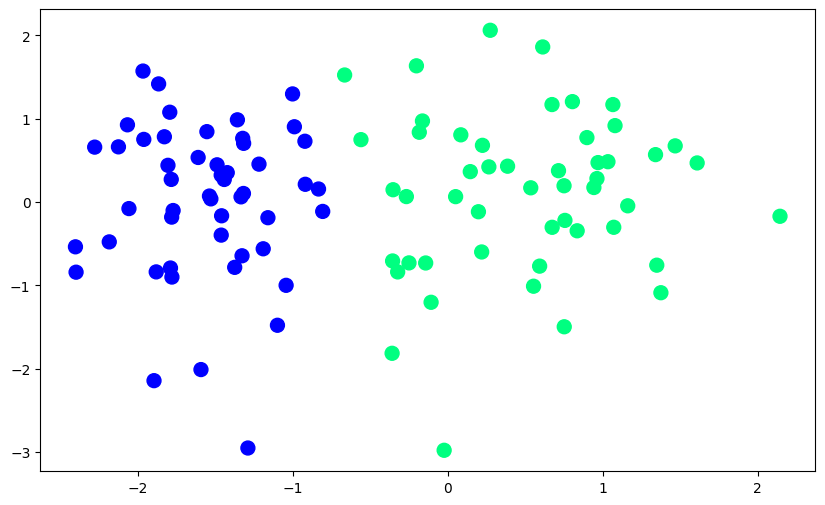

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [128]:

X[:10]

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794]])

In [130]:
X.shape[0] # Number of rows 

100

In [132]:
X.shape[1] # Number of cols 

2

In [134]:
def step(z):
    return 1 if z>0 else 0

In [136]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1) # we added here X0
    weights = np.ones(X.shape[1]) # Weights = [1,1,1]
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

The function `np.insert(X, 0, 1, axis=1)` is modifying the 2D array `X` by inserting a new column of data. Let me break it down step by step:

### Parameters of `np.insert`:
- **`X`**: This is the original 2D array (matrix) where you want to insert new data.
- **`0`**: This specifies the index (position) where you want to insert the new values. In this case, it's `0`, meaning the new values will be inserted at the very first column.
- **`1`**: This is the value to be inserted. Here, you're inserting `1`, which means a column filled with the value `1` will be added to `X`.
- **`axis=1`**: This tells NumPy to insert along the columns (axis 1). If you set `axis=0`, it would insert along the rows.

### What happens:
A new column, filled with the value `1`, is added to the beginning (index 0) of each row in `X`. This increases the number of columns by 1.


In [139]:
intercept_,coef_ = perceptron(X,y)

In [141]:
print(coef_)
print(intercept_)

[1.36542104 0.08646801]
1.0


In [143]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

* Ax + By + c = 0 
* y = -Ax/B -c/B

In [145]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

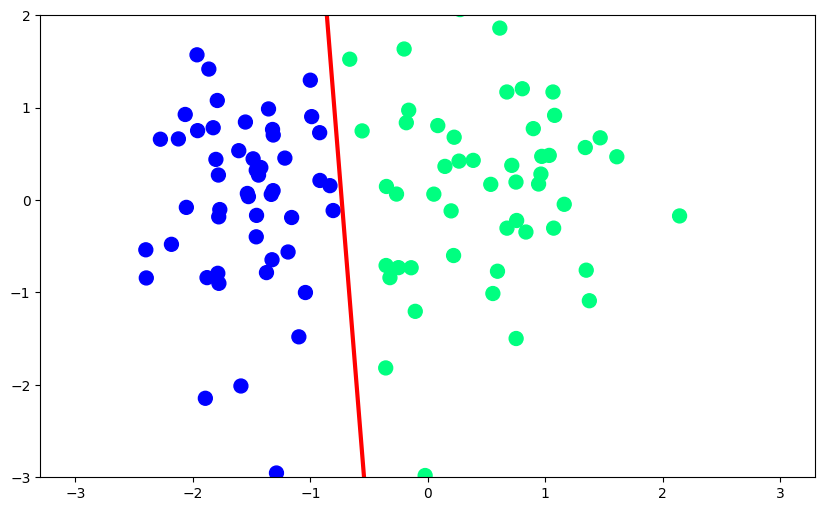

In [147]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)